In [1]:
from plot_data_utilities import plot_config_map, plot_visits_map
import json
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.lines import Line2D
import ast

In [2]:
curr_folder = os.getcwd()
main_dir = os.path.abspath(os.path.join(curr_folder, os.pardir))
input_dir_raw = os.path.join(main_dir, 'data_raw')

04_EE-NN
{'0': '\n            ##############\n            ..............\n            ..............\n            ..............\n            ..............\n            ..............\n            ##############'}
[]
03_EE-EE-agentdiff
{'0': '\n                ##..##\n                ##..##\n                ......\n                ......\n                ##..##\n                ##..##'}
[]
{'0': '\n            ##############\n            ..............\n            ..............\n            ..............\n            ..............\n            ..............\n            ##############'}
[(13, 3), (12, 4), (13, 4)]
{'0': '\n                #######\n                .......\n                ...#...\n                ...#...\n                .......\n                ...#...\n                ...#...\n                .......\n                #######'}
[]
{'0': '\n                #.#\n                ...\n                #.#'}
[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 

/tmp/ipykernel_48118/1747758670.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5))


[(12, 2)]
{'0': '\n            ##############\n            ..............\n            ..............\n            ..............\n            ..............\n            ..............\n            ##############'}
[(6, 3)]
{'0': '\n                #######\n                .......\n                ...#...\n                ...#...\n                .......\n                ...#...\n                ...#...\n                .......\n                #######'}
[]
{'0': '\n            ############\n            ....#.......\n            ....#.......\n            ............\n            ....#.......\n            ....#.......\n            ############', '4': '\n            ############\n            ....#.......\n            ....#.......\n            ....+.......\n            ....#.......\n            ....#.......\n            ############'}
[]
{'0': '\n            ##############\n            ..............\n            ..............\n            ..............\n            ..............\n  

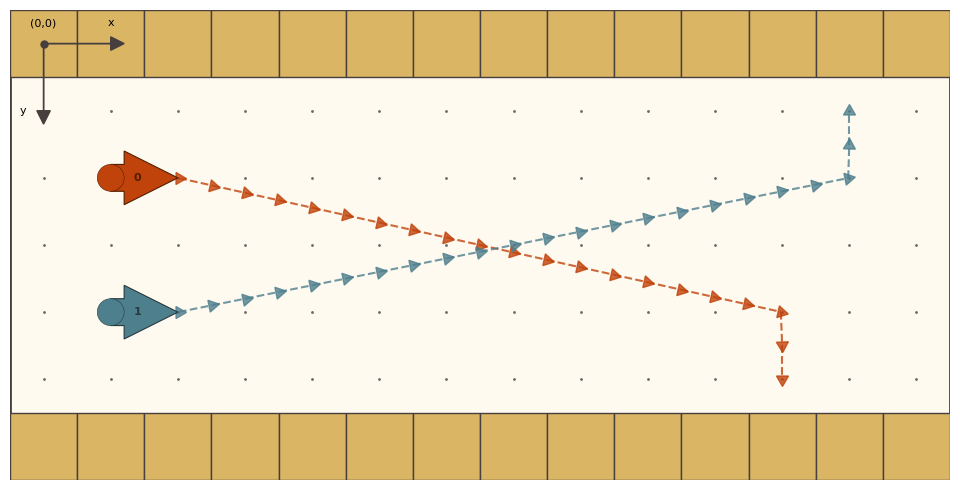

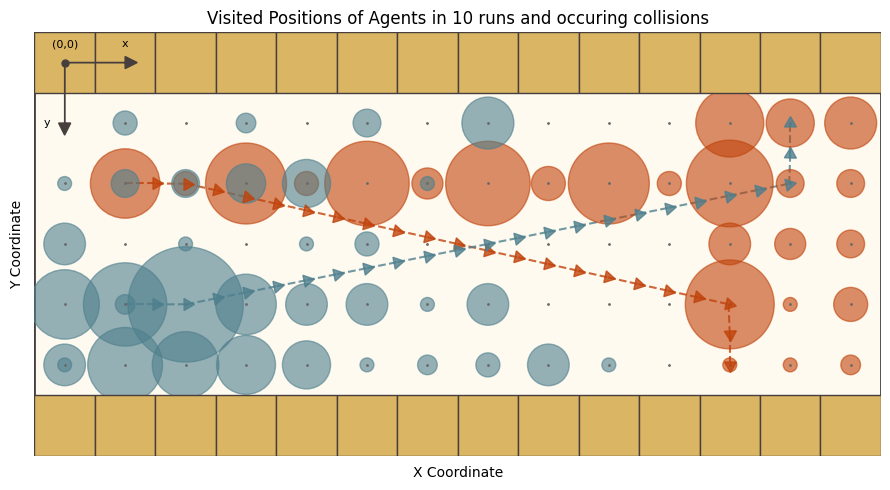

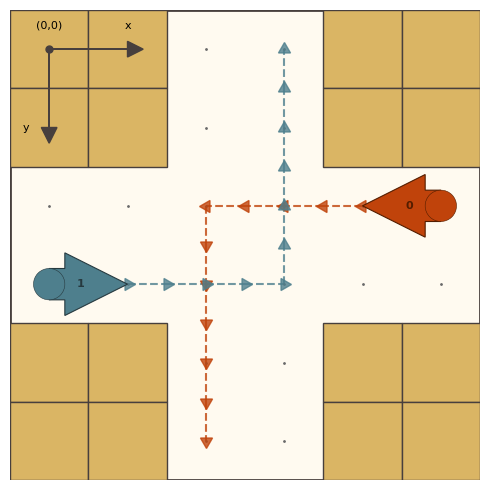

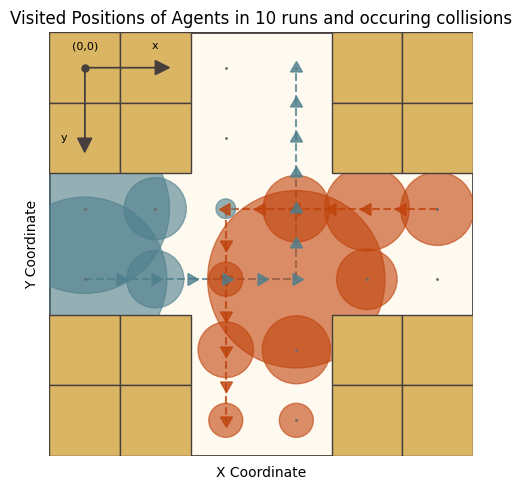

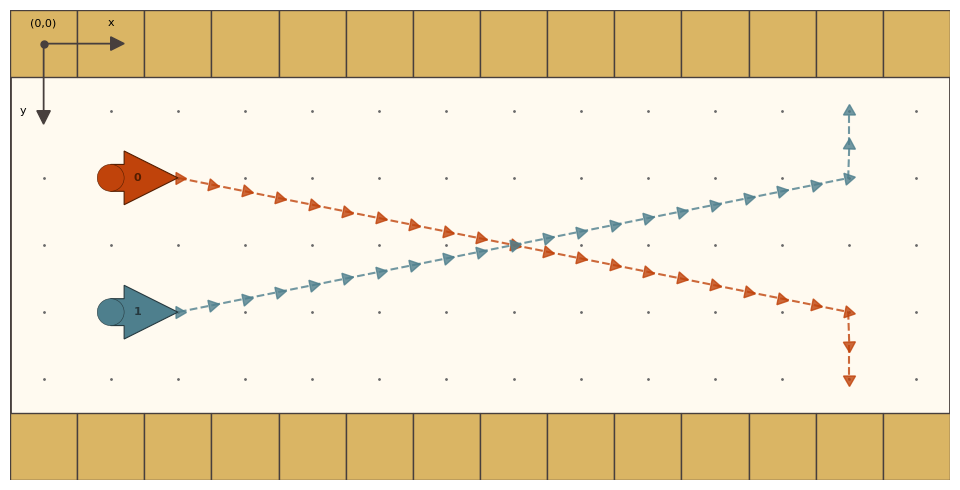

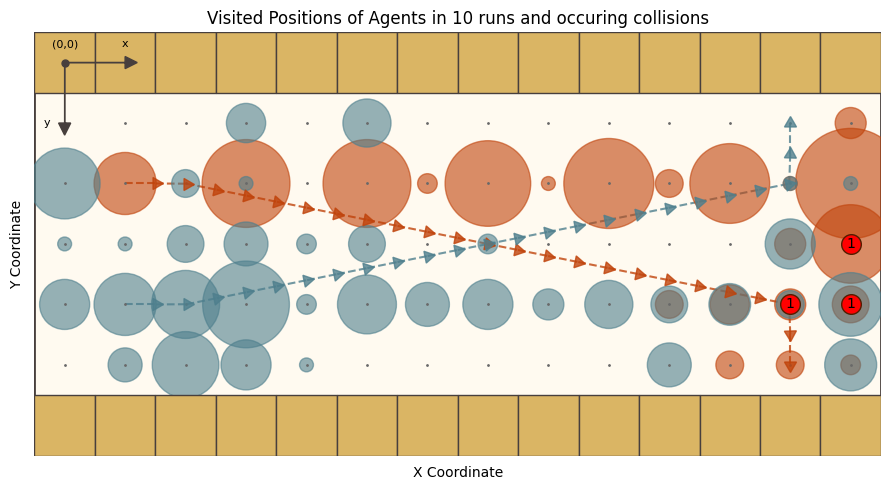

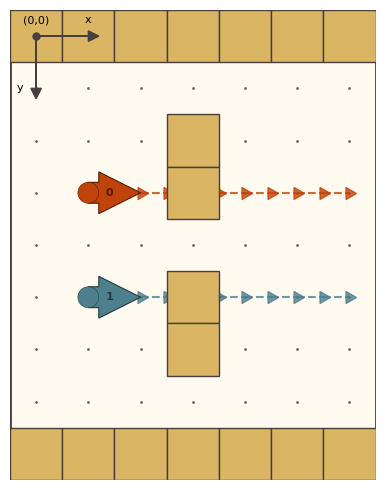

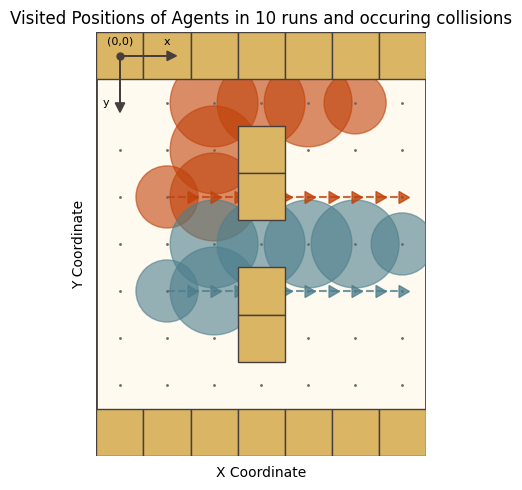

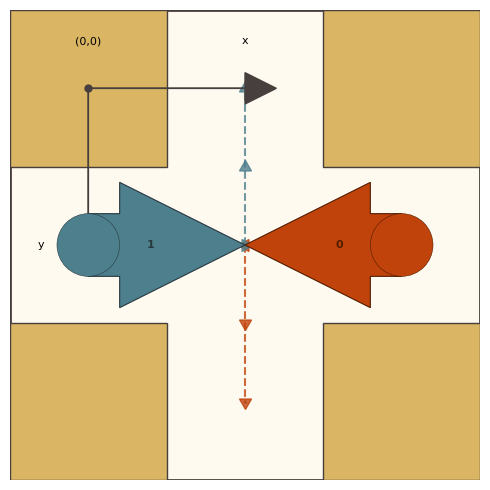

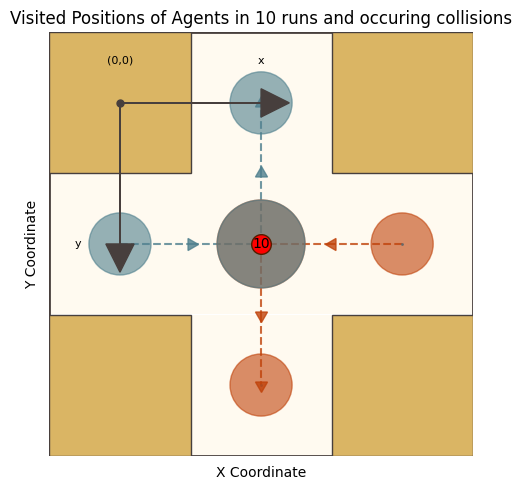

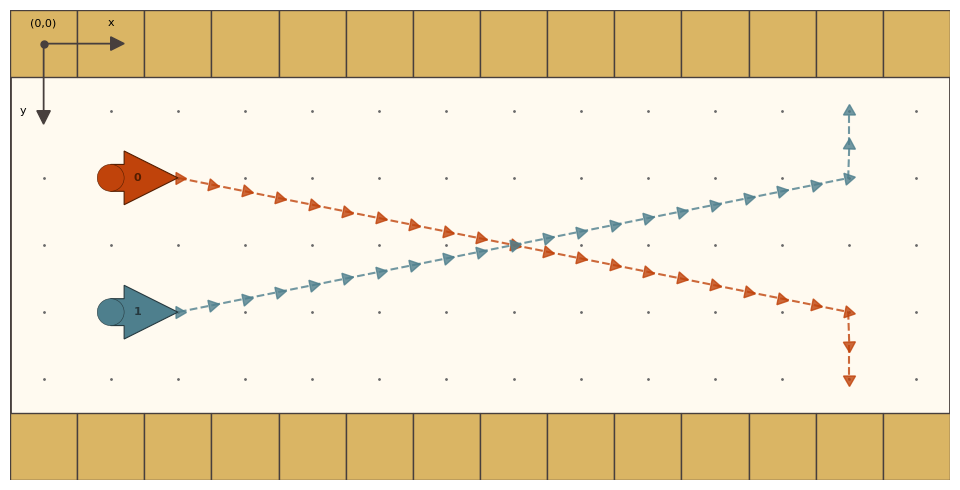

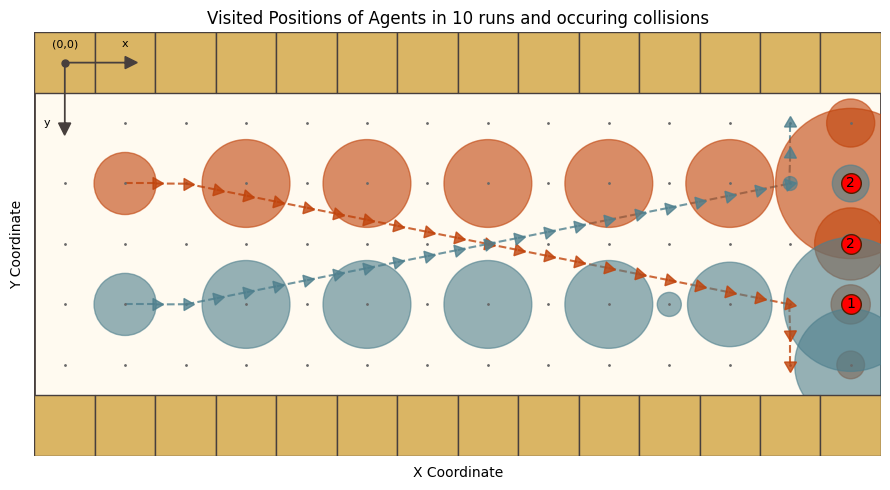

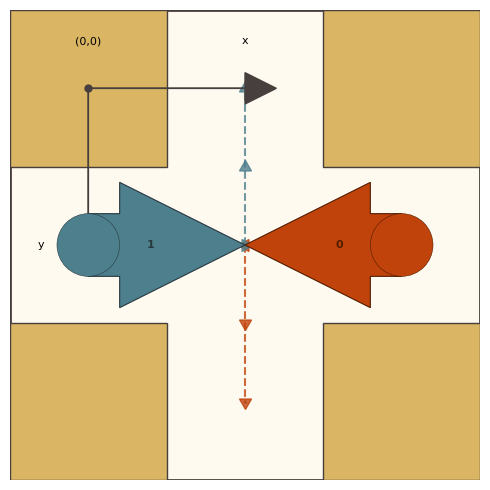

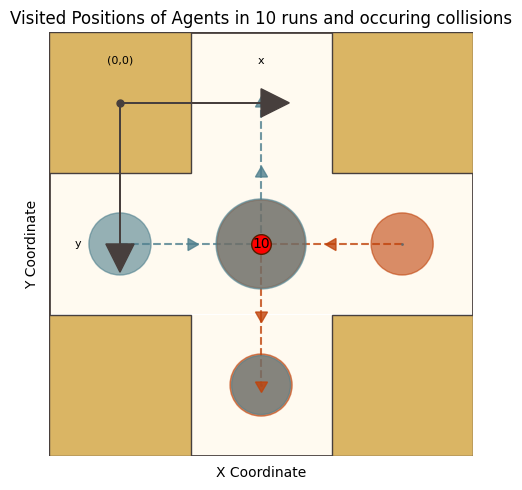

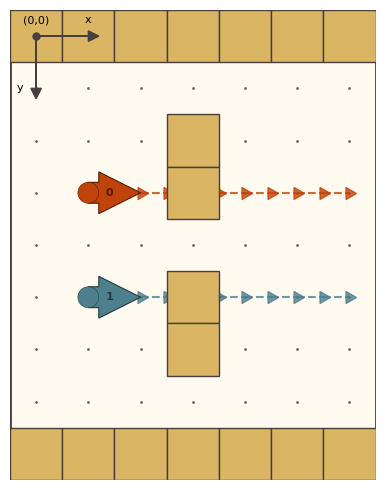

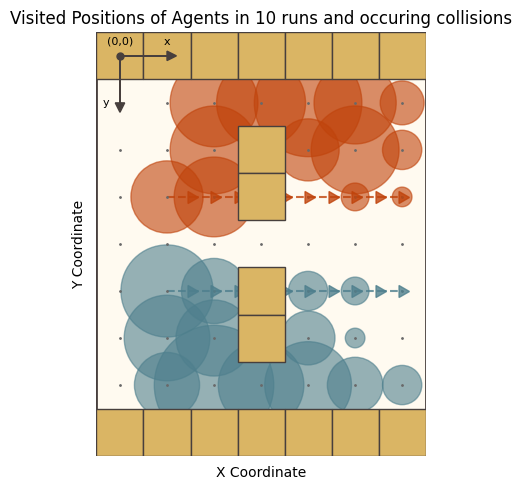

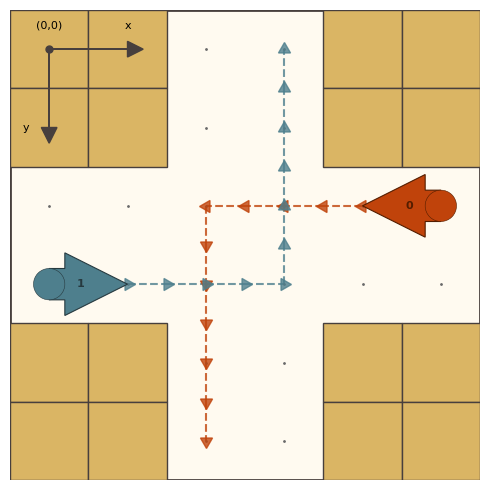

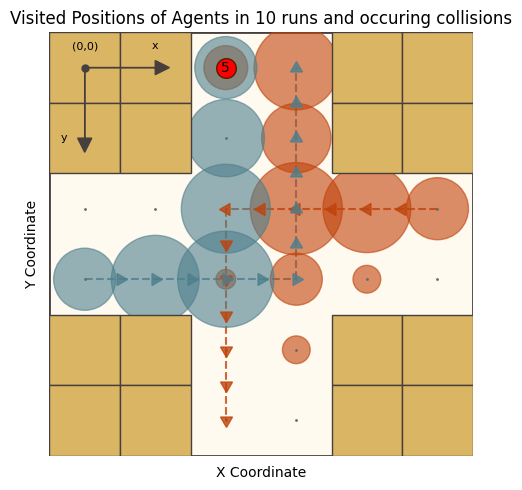

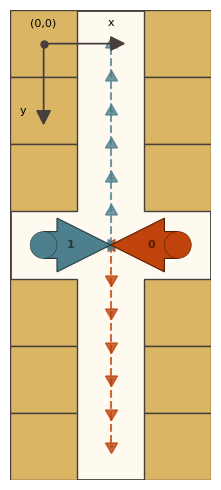

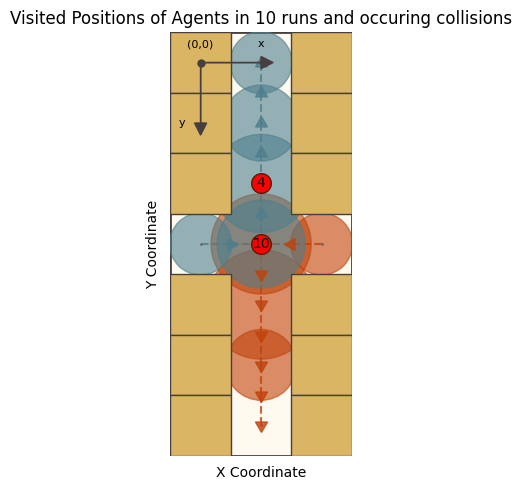

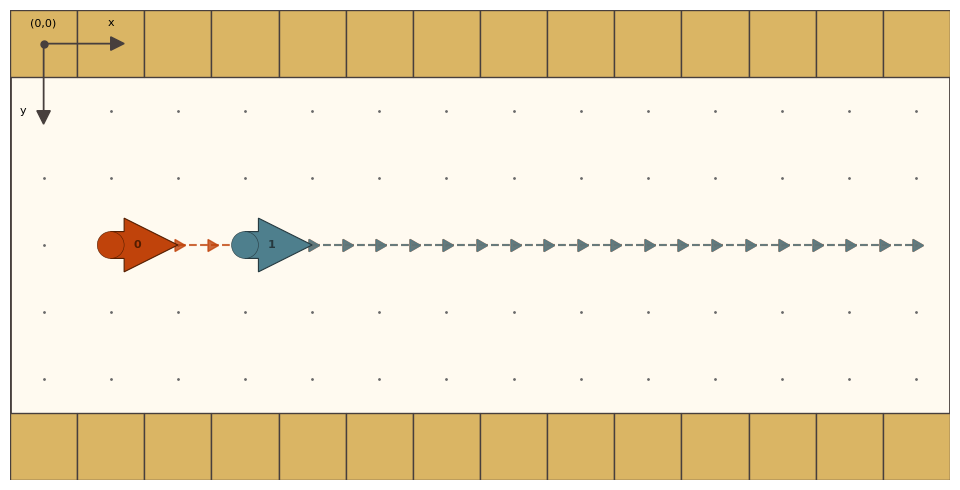

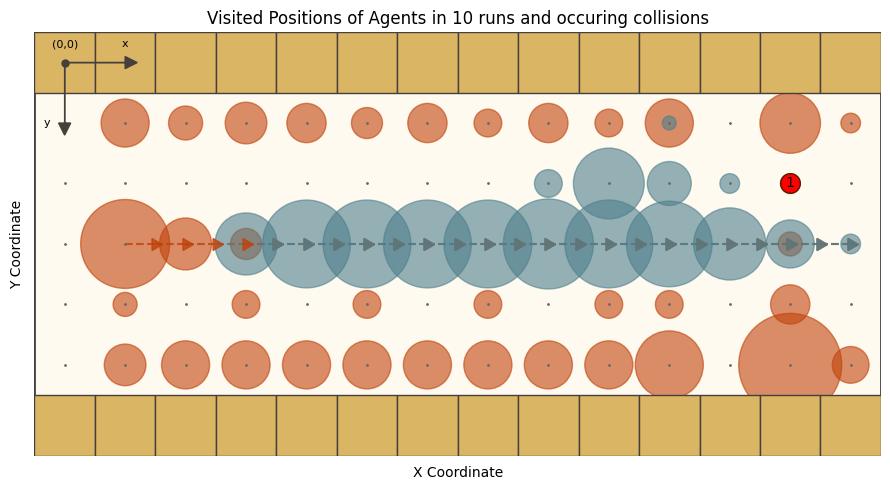

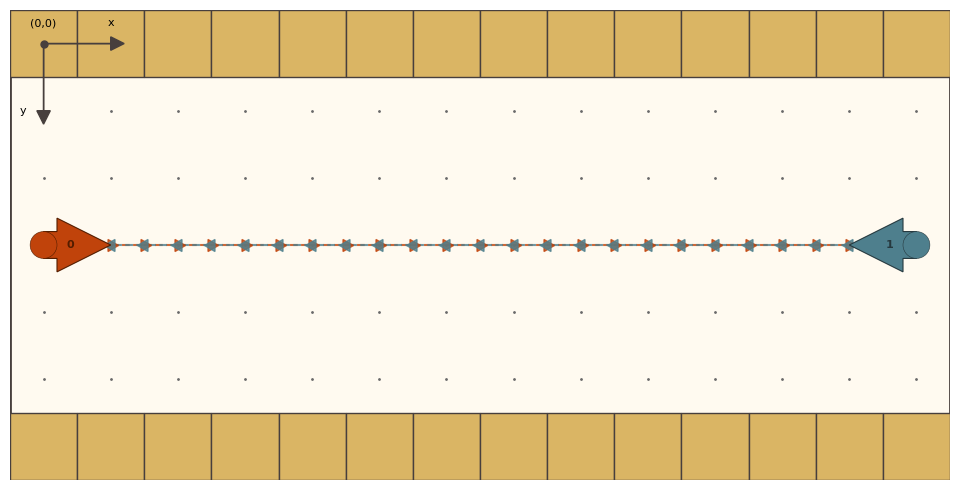

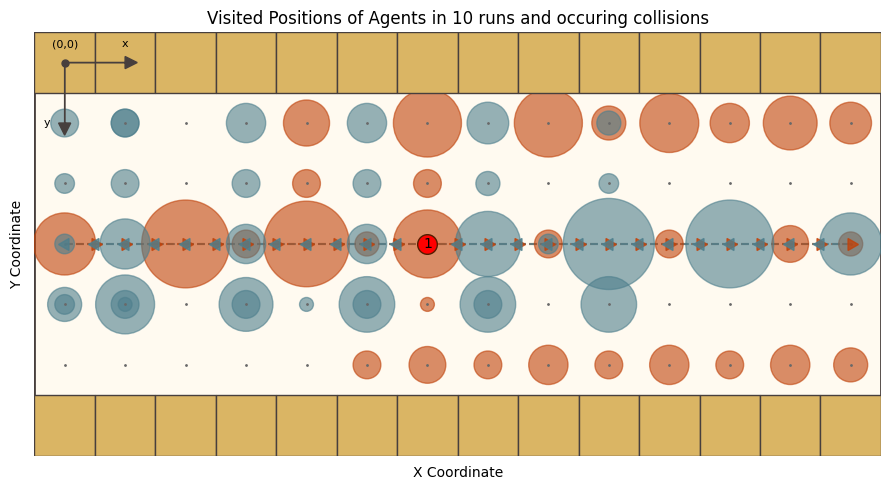

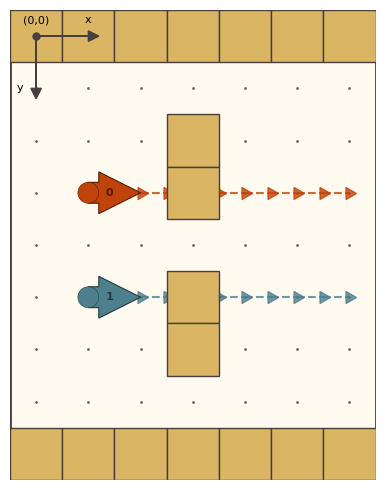

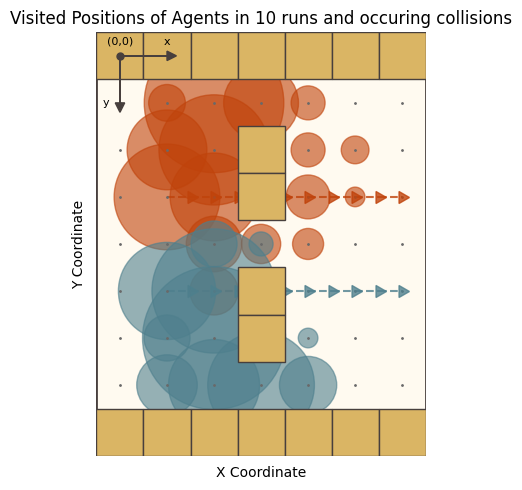

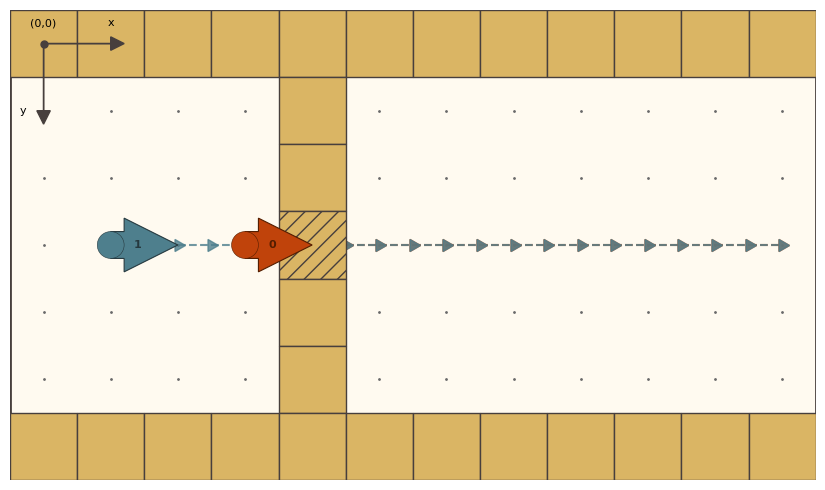

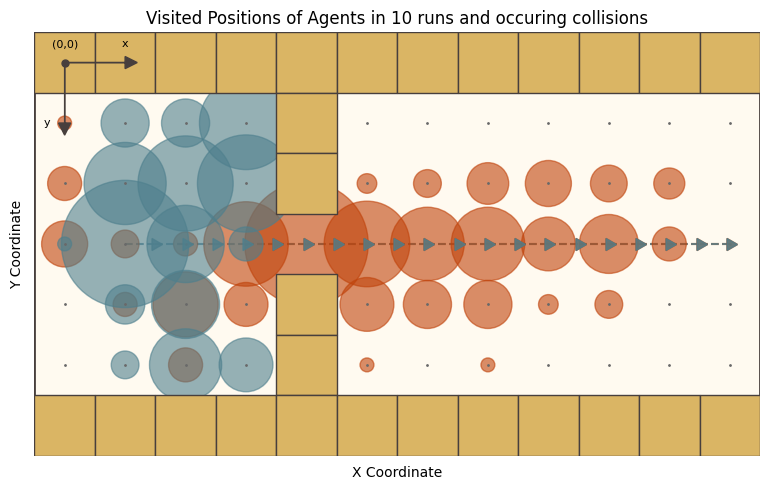

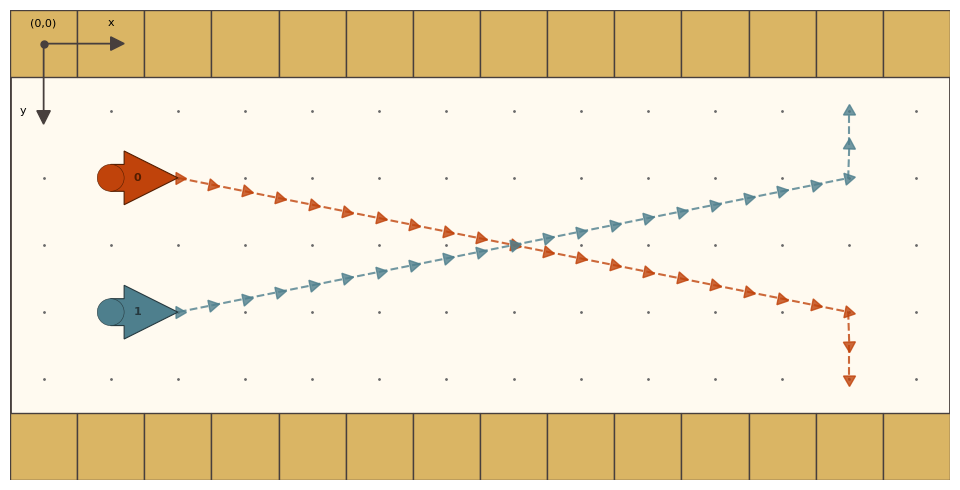

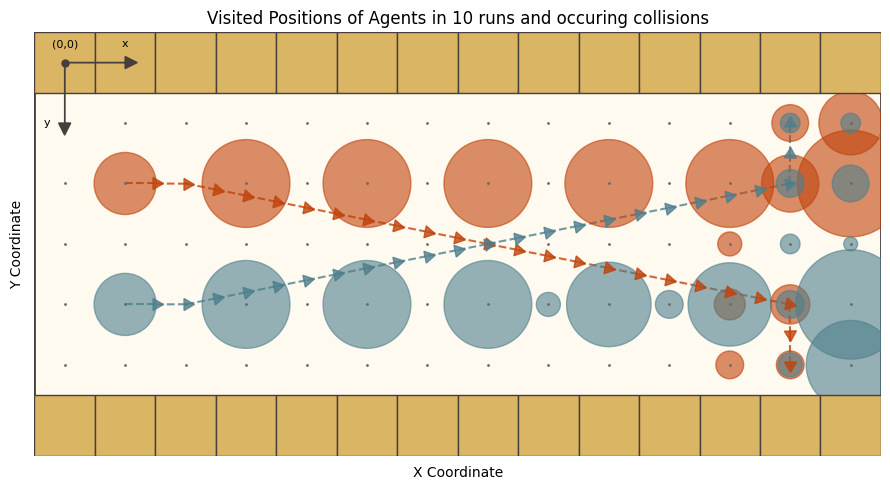

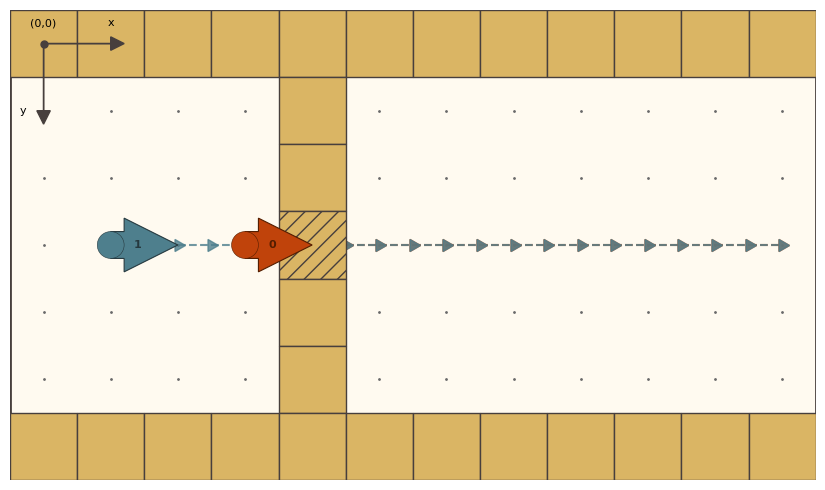

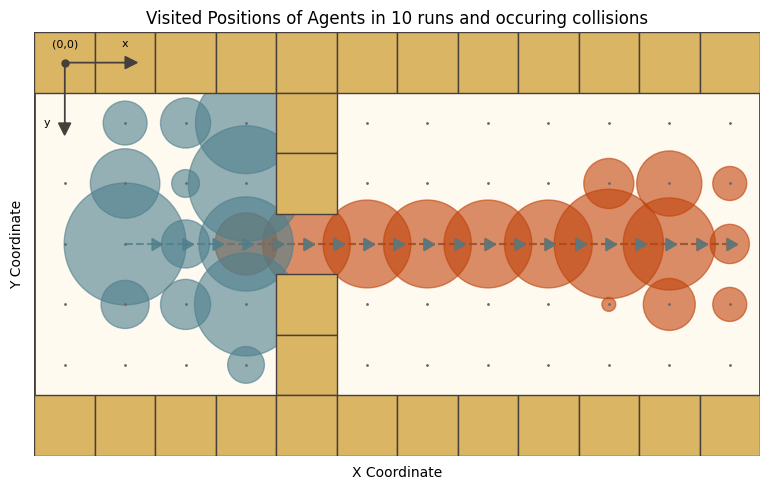

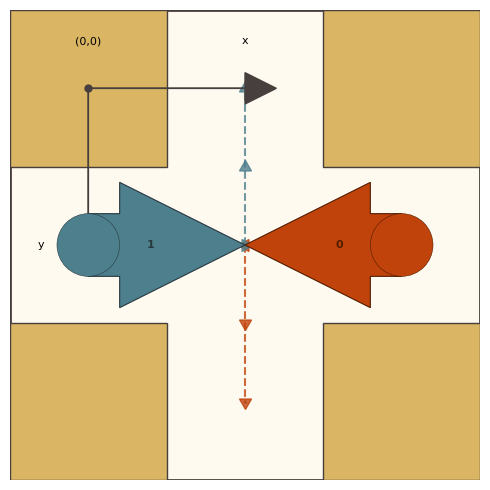

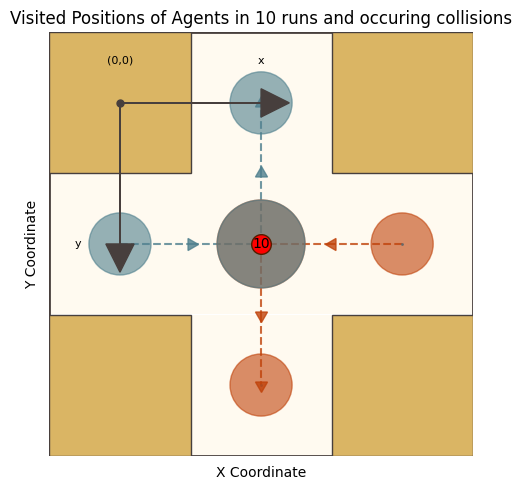

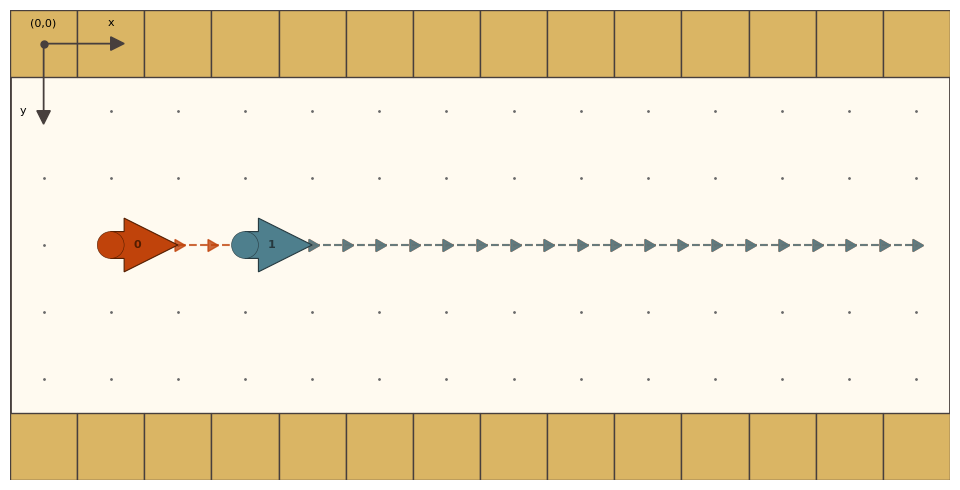

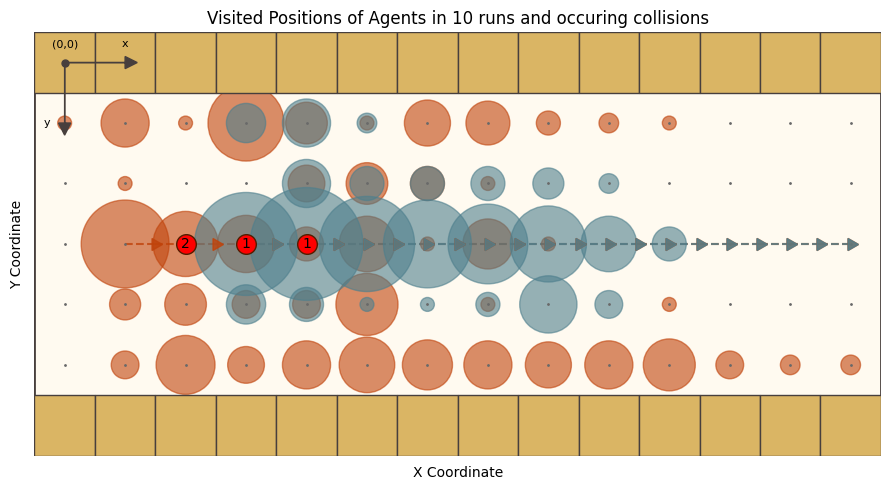

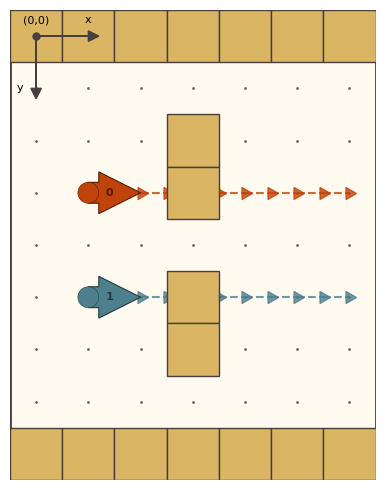

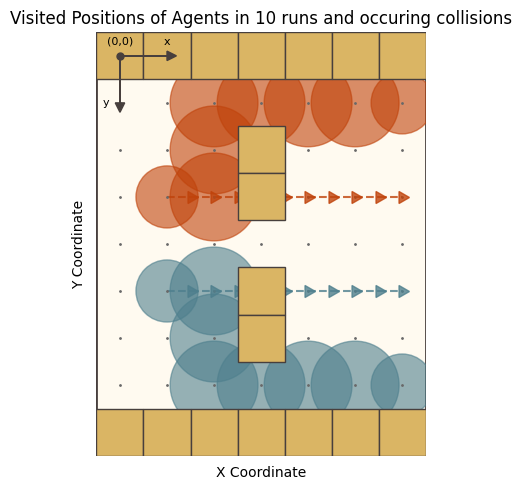

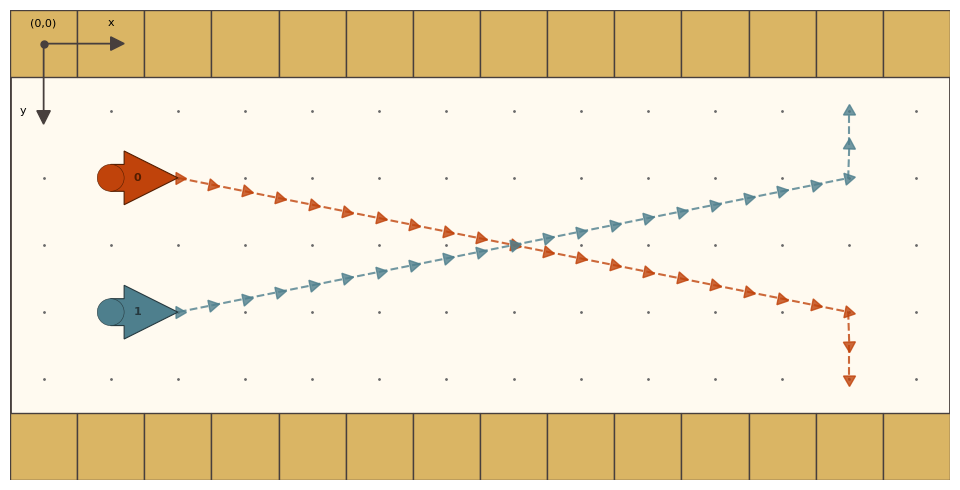

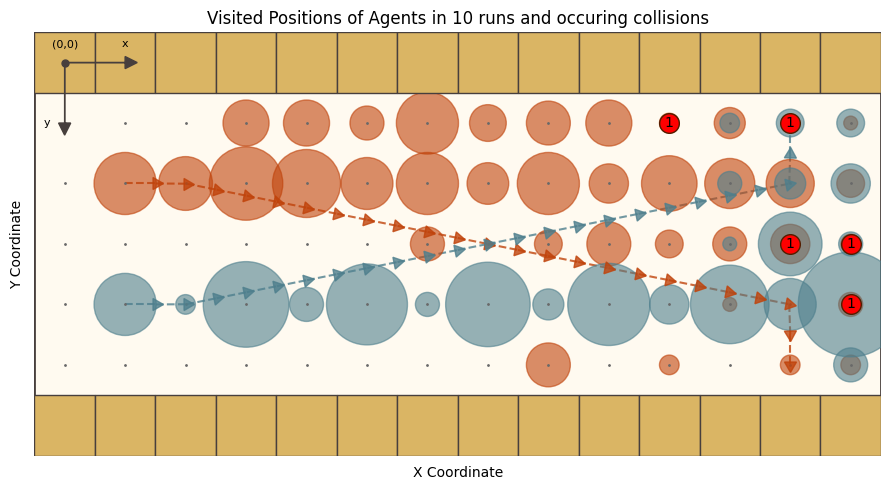

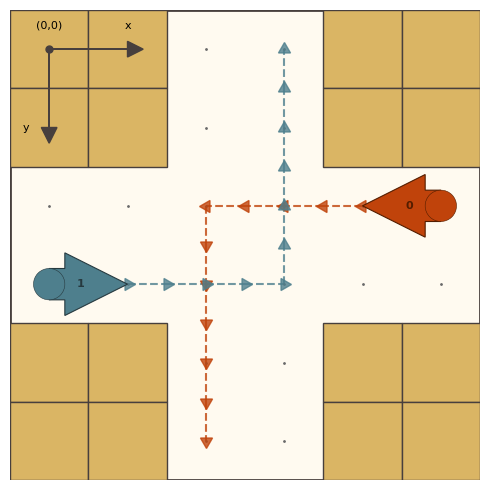

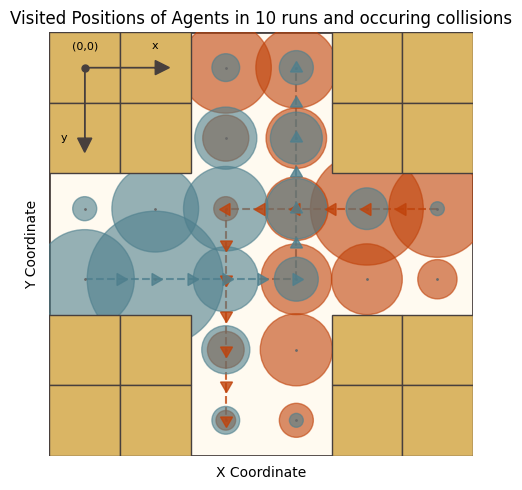

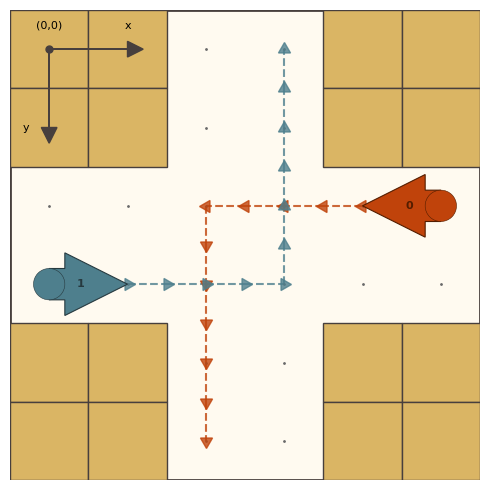

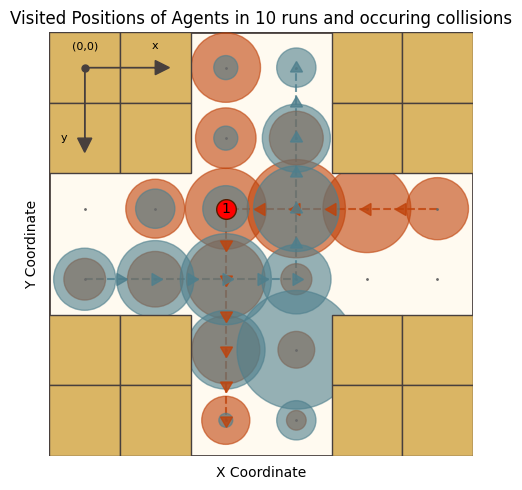

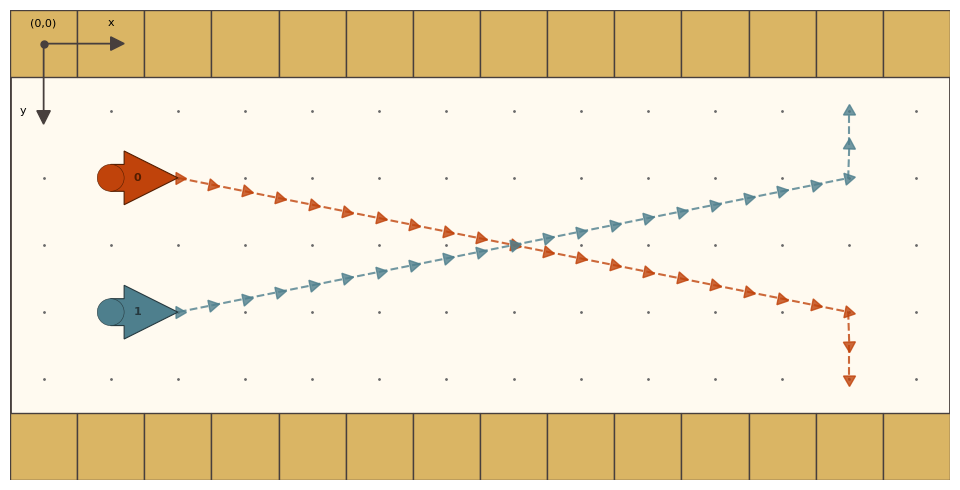

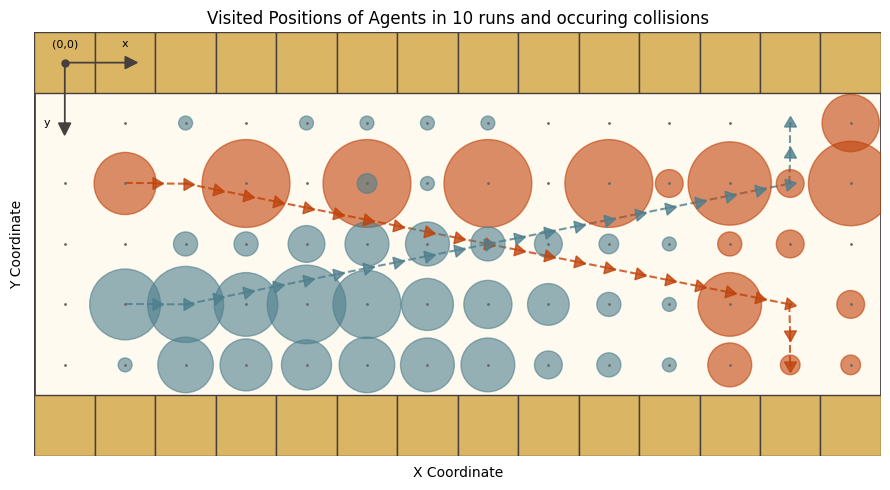

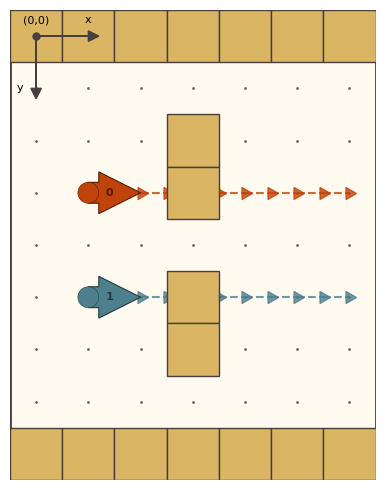

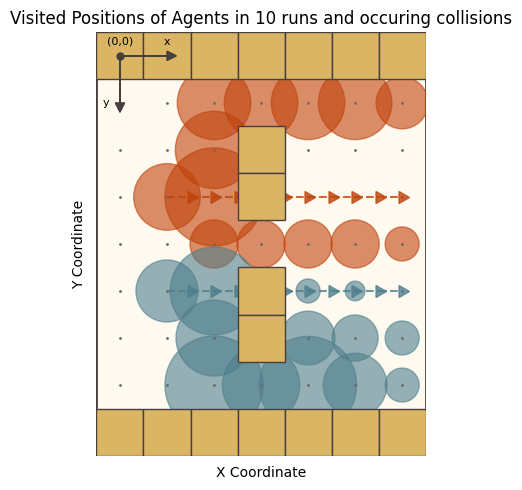

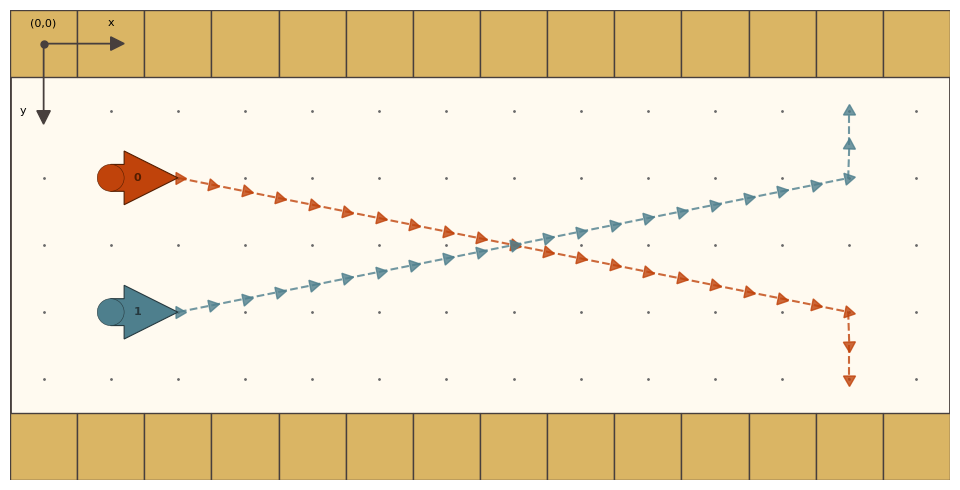

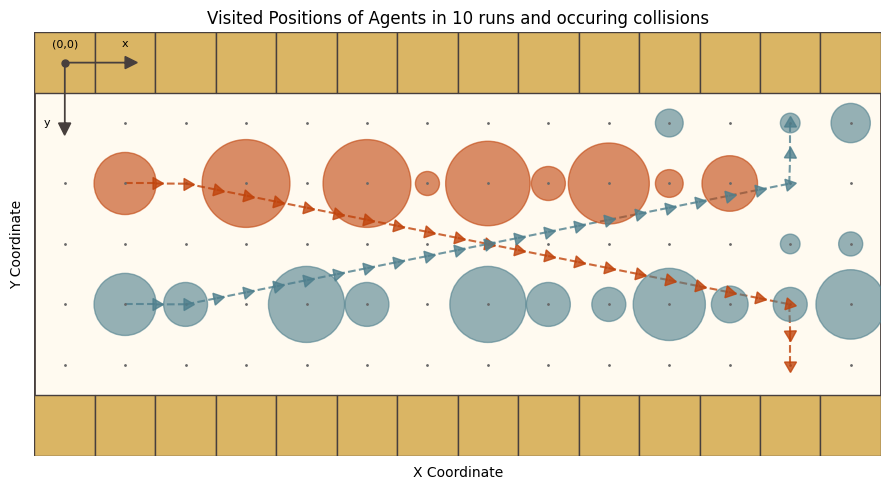

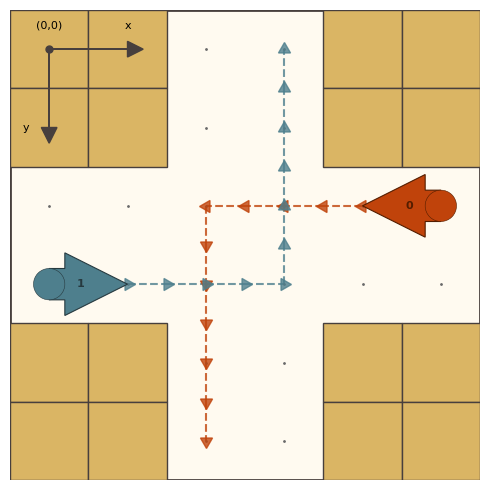

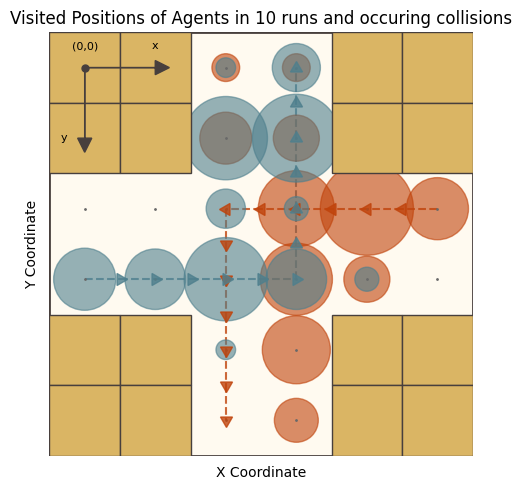

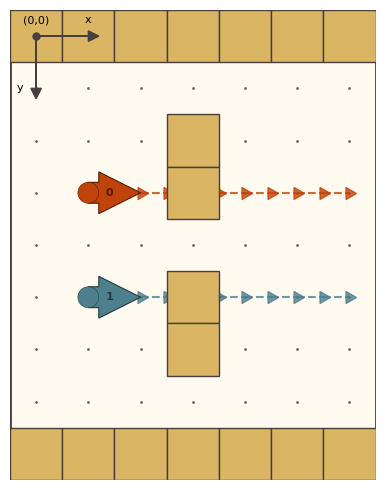

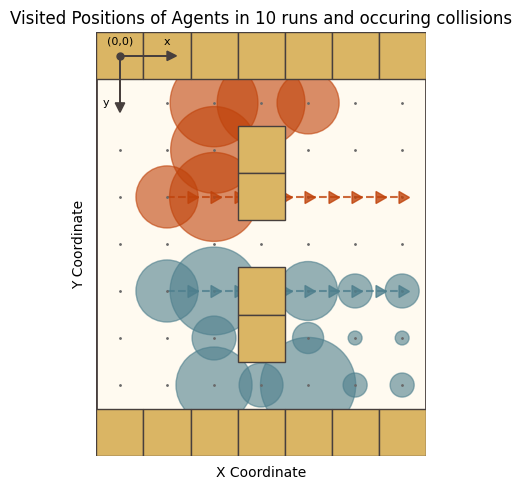

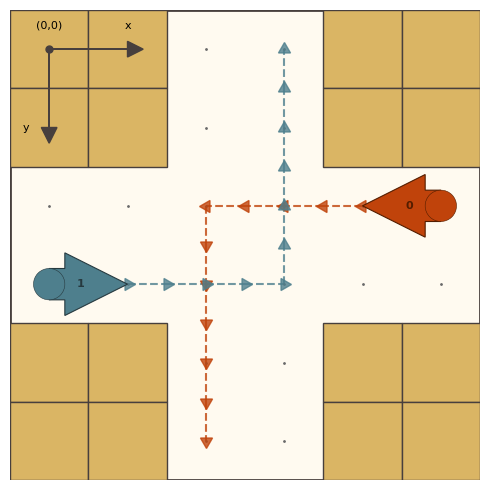

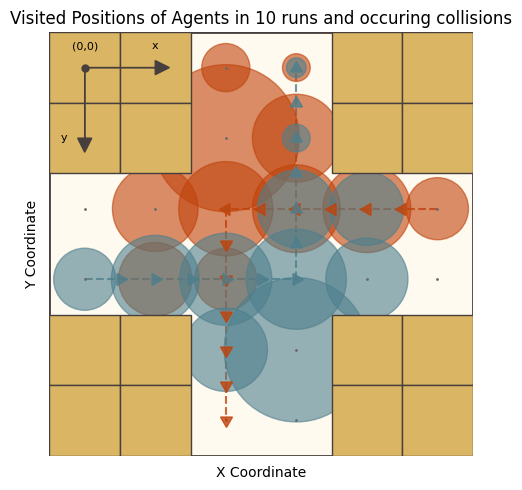

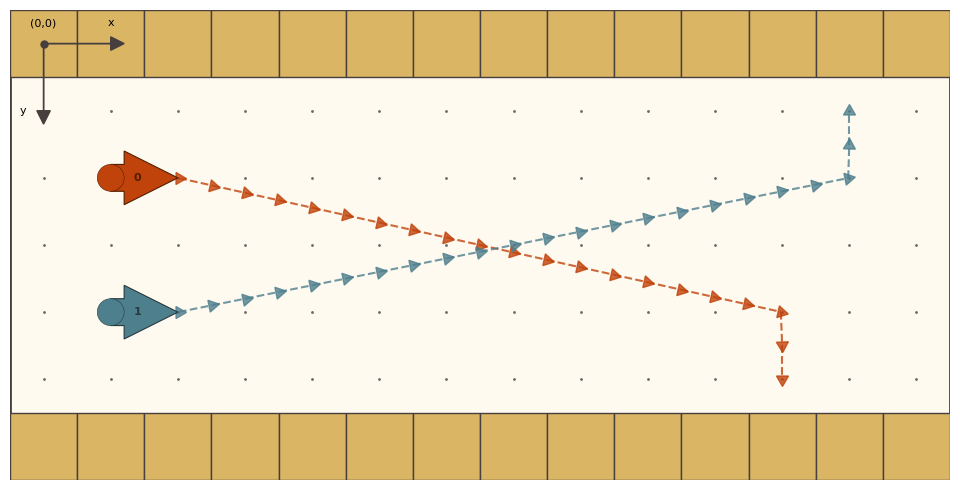

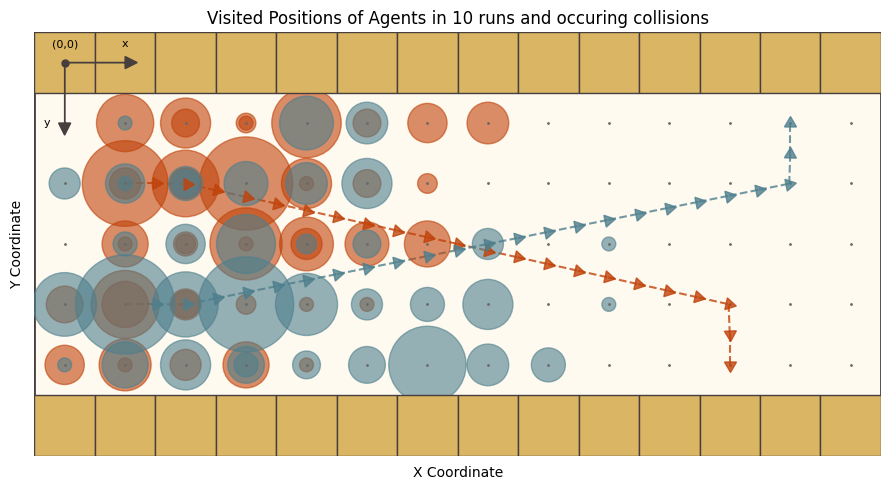

In [3]:
for folder in os.listdir(curr_folder):
    if os.path.isdir(os.path.join(curr_folder, folder)) and folder[:2].isdigit() and int(folder[:2]) >= 2:
        print(folder)
        subfolder = os.path.join(curr_folder, folder)
        
        for folder in os.listdir(subfolder):
            if os.path.isdir(os.path.join(subfolder, folder)) and not folder == "__pycache__":
                exp_folder = os.path.join(subfolder, folder)
                if not "policy_data.csv" in os.listdir(exp_folder):
                    continue

                #print(folder)
                exp_name = subfolder.split('/')[-1]
                result_dir = os.path.join(main_dir, "results/", exp_name, folder)
                
                #print(result_dir)
                if not os.path.exists(result_dir):
                    os.makedirs(result_dir)

                # Load the JSON file
                with open(os.path.join(input_dir_raw, exp_name, folder, "0", "conf_dict.json")) as f:
                    conf_dict = json.load(f)
                env_conf = conf_dict['env_conf']
                agent_conf = conf_dict['agent_conf_0']

                # Merge the dictionaries
                combined_conf_dict = {**env_conf, **agent_conf}
                print(combined_conf_dict["env_def"])




                # plot map with zero length
                fig, ax = plt.subplots(figsize=(10, 5))
                try:
                    plot_config_map(ax, combined_conf_dict, env_timestep=4, game_length=0)
                except:
                    plot_config_map(ax, combined_conf_dict, env_timestep=0, game_length=0)
                plt.tight_layout()
                plt.savefig(result_dir+"/"+str(folder)+"_env_config.svg", format="svg", bbox_inches='tight')
                plt.savefig(result_dir+"/"+str(folder)+"_env_config.png", dpi=200)

                # plot visit numbers
                fig, ax = plt.subplots(figsize=(10, 5))
                plot_visits_map(ax, combined_conf_dict, os.path.join(exp_folder, "result_data.csv"), env_timestep=0)
                plt.tight_layout()
                plt.savefig(result_dir+"/"+str(folder)+"_visits.svg", format="svg", bbox_inches='tight')
                plt.savefig(result_dir+"/"+str(folder)+"_visits.png", dpi=200)